In [69]:
from dike_model_function import DikeNetwork
from problem_formulation import get_model_for_problem_formulation
from ema_workbench.analysis import prim
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from ema_workbench import MultiprocessingEvaluator, ema_logging

In [70]:
used_problem_formulation = 2
dike_model, planning_steps = get_model_for_problem_formulation(used_problem_formulation)
#Not sure if this is necessary to have?

#for out in dike_model.outcomes:
    #print(repr(out))

In [71]:
ema_logging.log_to_stderr(ema_logging.INFO)

n_scenarios = 1000 #In assignment 5 is at first 1000 used and later on for the dimensional stacking 10000. 
n_policies = 8 #Not sure if we have to go for 8 again here like in the earlier exploratory modeling

with MultiprocessingEvaluator(dike_model) as evaluator:
    results = evaluator.perform_experiments(n_scenarios, n_policies)

[MainProcess/INFO] pool started with 4 workers
[MainProcess/INFO] performing 1000 scenarios * 8 policies * 1 model(s) = 8000 experiments
100%|██████████████████████████████████████| 8000/8000 [58:44<00:00,  2.27it/s]
[MainProcess/INFO] experiments finished
[MainProcess/INFO] terminating pool


In [72]:
experiments, outcomes = results

In [73]:
cleaned_experiments = experiments.drop(labels=[l.name for l in dike_model.levers], axis=1)

In [105]:
import numpy as np

data = outcomes['Expected Number of Deaths']
y = data < np.percentile(data, 95) #Not sure which percentile we need to use

#threshold (float) – the density threshold that a box has to meet
#Not sure which tresholds we need to use?
prim_alg = prim.Prim(cleaned_experiments,y, threshold=0.8, peel_alpha=0.005) 
box1 = prim_alg.find_box()

[MainProcess/INFO] model dropped from analysis because only a single category
[MainProcess/INFO] 8000 points remaining, containing 7600 cases of interest
[MainProcess/INFO] mean: 1.0, mass: 0.64125, coverage: 0.675, density: 1.0 restricted_dimensions: 5


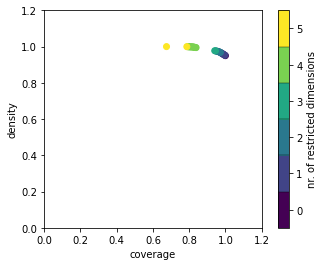

In [106]:
box1.show_tradeoff()
plt.show()

coverage      0.675
density           1
id               31
mass        0.64125
mean              1
res_dim           5
Name: 31, dtype: object

                                   box 31                                  \
                                      min                             max   
A.3_pfail                       0.0918535                        0.999198   
policy     {162, 163, 164, 166, 167, 168}  {162, 163, 164, 166, 167, 168}   
A.5_pfail                       0.0218999                        0.999062   
A.1_pfail                        0.031844                        0.999445   
A.2_pfail                      0.00724219                        0.999989   

                                           
                                qp values  
A.3_pfail  [1.2793476630156388e-67, -1.0]  
policy      [3.686115523209407e-40, -1.0]  
A.5_pfail    [0.007410428636245538, -1.0]  
A.1_pfail     [0.14445981083636475, -1.0]  
A.2_pfail                     [1.0, -1.0]  



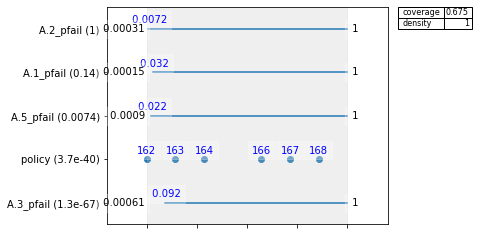

In [99]:
box1.inspect()
box1.inspect(style='graph')
plt.show()

In [100]:
from ema_workbench.analysis import dimensional_stacking

[MainProcess/INFO] model dropped from analysis because only a single category


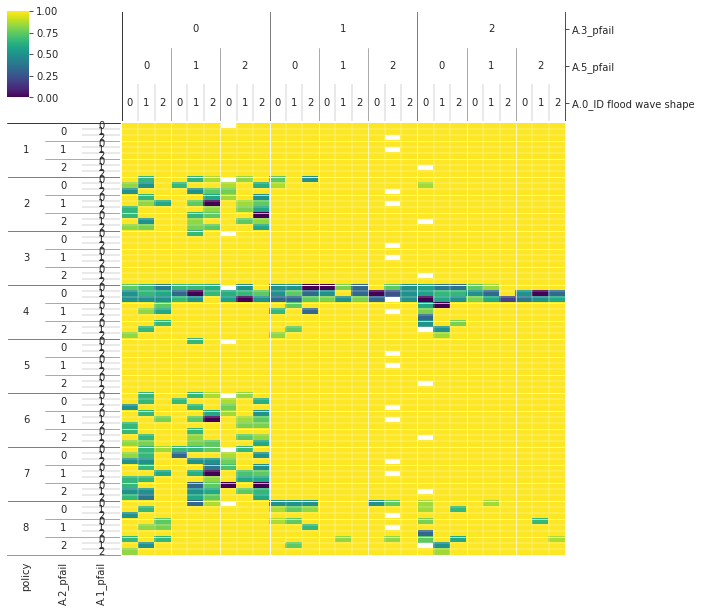

In [101]:
dimensional_stacking.create_pivot_plot(cleaned_experiments, y)
plt.show()